In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [15]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df.drop("Id", axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
print(df["SepalLengthCm"].unique())
print(df["SepalWidthCm"].unique())
print(df["PetalLengthCm"].unique())
print(df["PetalWidthCm"].unique())

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


In [19]:
# ohe_species = pd.get_dummies(df["Species"]).astype(int)

# df = pd.concat([df, ohe_species], axis=1)

# df.drop("Species", axis=1, inplace=True)

# print(df.head())

In [20]:
from sklearn.model_selection import train_test_split

X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df.iloc[:, -1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(150, 4) (150,)


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
np.sqrt(y.shape)

array([12.24744871])

In [23]:
from sklearn.neighbors import KNeighborsClassifier

K = int(np.sqrt(y.shape)) + 1

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average="macro")
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average="macro")
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="macro")
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9696969696969697
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613


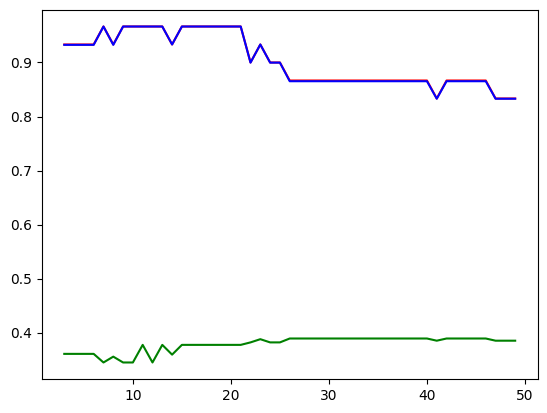

In [25]:
from sklearn.metrics import accuracy_score, f1_score, silhouette_score

ks = range(3, 50)

accuracies = []
f1s = []
silhouette_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="macro"))
    silhouette_scores.append(silhouette_score(X_test, y_pred))

plt.plot(ks, accuracies, c='r')
plt.plot(ks, f1s, c='b')
plt.plot(ks, silhouette_scores, c='g')
plt.show()